In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import cycler

import scipy_extra.stats
import scipy_extra.optimize
import scipy_extra.fit

import importlib
importlib.reload(scipy_extra.stats)
importlib.reload(scipy_extra.fit)

import uncertainties

In [2]:
class Tango(object):

    scarlet_red_light = '#ef2929'
    scarlet_red = '#cc0000'
    scarlet_red_dark = '#a40000'

    aluminium_light = '#eeeeec'
    aluminium = '#d3d7cf'
    aluminium_dark = '#babdb6'

    butter_light = '#fce94f'
    butter = '#edd400'
    butter_dark = '#c4a000'

    chameleon_light = '#8ae234'
    chameleon = '#73d216'
    chameleon_dark = '#4e9a06'

    orange_light = '#fcaf3e'
    orange = '#f57900'
    orange_dark = '#ce5c00'

    chocolate_light = '#e9b96e'
    chocolate = '#c17d11'
    chocolate_dark = '#8f5902'

    sky_blue_light = '#729fcf'
    sky_blue = '#3465a4'
    sky_blue_dark = '#204a87'

    plum_light = '#ad7fa8'
    plum = '#75507b'
    plum_dark = '#5c3566'

    slate_light = '#888a85'
    slate = '#555753'
    slate_dark = '#2e3436'
    
    @staticmethod
    def get_color_palette(n_colors=9):
        colors = [Tango.sky_blue_dark, Tango.orange_dark, Tango.chocolate, Tango.slate_light, Tango.aluminium_dark, Tango.plum_dark, Tango.plum_light, Tango.chameleon_dark, Tango.chameleon_light]

        if n_colors > len(colors):
            print('Only {} different colors in list. All are returned.')
            return colors

        return colors[:n_colors]


def _init_style():
    matplotlib.rcParams['axes.axisbelow'] = True
    matplotlib.rcParams['axes.edgecolor'] = '.8'
    matplotlib.rcParams['axes.facecolor'] =  'white'
    matplotlib.rcParams['axes.grid'] =  True
    matplotlib.rcParams['axes.labelcolor'] =  '.15'
    matplotlib.rcParams['axes.linewidth'] = 1
    matplotlib.rcParams['figure.facecolor'] = 'white'
    matplotlib.rcParams['font.family'] =  ['sans-serif']
    matplotlib.rcParams['font.sans-serif'] =  ['Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
    matplotlib.rcParams['grid.color'] = '.8'
    matplotlib.rcParams['grid.linestyle'] = '-'
    matplotlib.rcParams['image.cmap'] = 'Greys'
    matplotlib.rcParams['legend.frameon'] = True
    matplotlib.rcParams['legend.shadow'] = True
    matplotlib.rcParams['legend.fancybox'] = True
    matplotlib.rcParams['legend.numpoints'] = 1
    matplotlib.rcParams['legend.scatterpoints'] = 1
    matplotlib.rcParams['lines.solid_capstyle'] = 'round'
    matplotlib.rcParams['text.color'] =  '.15'
    matplotlib.rcParams['xtick.color'] = '.15'
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['xtick.major.size'] = 0
    matplotlib.rcParams['xtick.minor.size'] = 0
    matplotlib.rcParams['ytick.color'] = '.15'
    matplotlib.rcParams['ytick.direction'] = 'out'
    matplotlib.rcParams['ytick.major.size'] = 0
    matplotlib.rcParams['ytick.minor.size'] = 0
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.titlesize'] = 32
    matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)
    matplotlib.rcParams['font.size'] = 30
    matplotlib.rcParams['grid.linewidth'] = 1.6
    matplotlib.rcParams['legend.fontsize'] = 32
    matplotlib.rcParams['lines.linewidth'] = 2.8
    matplotlib.rcParams['lines.markeredgewidth'] = 0.0
    matplotlib.rcParams['lines.markersize'] = 11.2
    matplotlib.rcParams['patch.linewidth'] = 0.48
    matplotlib.rcParams['xtick.labelsize'] = 28
    matplotlib.rcParams['xtick.major.pad'] = 11.2
    matplotlib.rcParams['xtick.major.width'] = 1.6
    matplotlib.rcParams['xtick.minor.width'] = 0.8
    matplotlib.rcParams['ytick.labelsize'] = 28
    matplotlib.rcParams['ytick.major.pad'] = 11.2
    matplotlib.rcParams['ytick.major.width'] = 1.6
    matplotlib.rcParams['ytick.minor.width'] = 0.8
    matplotlib.rcParams['axes.prop_cycle'] = cycler.cycler("color", Tango.get_color_palette())
    plt.rc('text', usetex=True)

_init_style()

class Component(object):
    evtgen_charged = r'$\Upsilon(4\mathrm{S}) \rightarrow B^+ B^-$'
    evtgen_mixed = r'$\Upsilon(4\mathrm{S}) \rightarrow B^0 \bar{B}^0$'
    evtgen_charm = r'$e^+ e^- \rightarrow c \bar{c}$'
    evtgen_uds = r'$e^+ e^- \rightarrow q \bar{q}\ (u d s)$'
    special_mixedrare = r'$B^0 \rightarrow rare$'
    special_chargedrare = r'$B^+ \rightarrow rare$'
    special_mixedulnu = r'$B^0 \rightarrow u l \nu$'
    special_chargedulnu = r'$B^+ \rightarrow u l \nu$'
    data_continuum = r'off-resonance data'
    data_Y4S = r'on-resonance data'
    signal = r'$B^+ \rightarrow \tau^+ \nu$'
    b2taunu = r'$B^+ \rightarrow \tau^+ \nu$'

    @classmethod
    def get(cls, component):
        component = component.replace('-', '_')
        if hasattr(cls, component):
            return getattr(cls, component)
        return component.replace('_', '-')
    
    @classmethod
    def get_color(cls, component):
        
        color = {
            'signal': Tango.sky_blue_dark,
            'evtgen-charged': Tango.orange_dark,
            'evtgen-mixed': Tango.chocolate,
            'evtgen-charm': Tango.slate_light,
            'evtgen-uds': Tango.aluminium_dark,
            'special-mixedrare': Tango.chameleon_dark,
            'special-mixedulnu': Tango.chameleon_light,
            'special-chargedrare': Tango.plum_dark,
            'special-chargedulnu': Tango.plum_light,
            'data-Y4S': 'black',
            'data-continuum': 'black',
            'background': Tango.orange_dark,
            'continuum': Tango.slate_light,
        }
        
        return color.get(component, 'black')
        component = component.replace('-', '_')
        if hasattr(cls, component):
            return getattr(cls, component)
        return component.replace('_', '-')


event_types = ['signal',
           'evtgen-charged',
           'evtgen-mixed',
           'evtgen-charm',
           'evtgen-uds',
           'special-mixedulnu',
           'special-mixedrare',
           'special-chargedulnu',
           'special-chargedrare',
           'data-Y4S',
           'data-continuum',
          ]

extraEnergy = 'ROE_eextra__boMichaelROE__bc'
weight = 'weight'

binning = dict(range=(0.0, 1.2), bins=24)
space = np.linspace(*binning['range'], 1000)

In [3]:
df = pd.read_pickle('/storage/jbod/tkeck/B2TauNuWorkspace_1/full_stream/belle1_final_stream_1_selected.pickle')
special_mask = df.index.get_level_values('event_types').isin(['special-chargedrare']) & df.is_signal_event

In [68]:
df = df[~special_mask]

In [59]:
def create_template(component):
    return scipy.stats.rv_histogram(np.histogram(component[extraEnergy].values, **binning))

def create_smoothed_kde_template(component):
    kde = scipy.stats.gaussian_kde(np.r_[component[extraEnergy].values, -component[extraEnergy].values, -component[extraEnergy].values + 2.4], 0.05)
    return scipy.stats.rv_histogram((kde.pdf(space[:-1]), space))

def create_smoothed_bsp_template(component):
    space = np.linspace(*binning['range'], binning['bins'])
    y, x, = np.histogram(component[extraEnergy].values, **binning)
    weights = np.ones(binning['bins'])
    weights[0] = 2.0
    knots = [0.05, 0.1, 0.2, 0.5, 0.8]
    spline = scipy.interpolate.LSQUnivariateSpline(x[:-1], y, knots, w=weights)
    return scipy.stats.rv_histogram((np.maximum(spline(space[:-1]), 0.0), space))

def create_smoothed_fit_template(component):
    
    distribution = scipy_extra.stats.rv_mixture([
        ('exponential', scipy.stats.expon),
        ('polynom', scipy_extra.stats.chebyshev_2),
    ])
    
    def mapping(free_parameters):
        # Restrict all norms to positive values
        free_parameters[0] = max(free_parameters[0], 0.0)
        free_parameters[1] = max(free_parameters[1], 0.0)
        # Cannot be too narrow (50 MeV is the detector cutoff)
        free_parameters[5] = max(free_parameters[5], 0.05)
        return {
            'exponential_loc': 0.0,
            'exponential_scale': free_parameters[5],
            'exponential_norm': free_parameters[0],
            'polynom_loc': 0.6,
            'polynom_scale': 0.6,
            'polynom_norm': free_parameters[1],
            'polynom_a_0': free_parameters[2],
            'polynom_a_1': free_parameters[3],
            'polynom_a_2': free_parameters[4],

        }

    def normalisation(p):
        return p['exponential_norm'] + p['polynom_norm']
    
    fitter = scipy_extra.fit.Fitter(mapping, distribution, normalisation)
    r = fitter.fit([0.5, 0.5, 1.0, 1.0, 1.0, 0.15], component[extraEnergy].values)
    d = distribution(**mapping(r.x))
    
    return scipy.stats.rv_histogram((np.maximum(d.pdf(space[:-1]), 0.0), space))

def create_smoothed_simple_fit_template(component):
    
    distribution = scipy_extra.stats.chebyshev_1
    
    def mapping(free_parameters):
        return {
            'loc': 0.6,
            'scale': 0.6,
            'a_0': free_parameters[0],
            'a_1': free_parameters[1],
        }
    
    fitter = scipy_extra.fit.Fitter(mapping, distribution)
    r = fitter.fit([0.5, 0.5], component[extraEnergy].values)
    d = distribution(**mapping(r.x))
    
    return scipy.stats.rv_histogram((np.maximum(d.pdf(space[:-1]), 0.0), space))

In [60]:
final_templates = {}

for dM in [1,2,3,4,5,11,12,13,14,15]:
    x = df.loc[dM, [extraEnergy, weight]]
    final_templates[dM] = {
        'raw': {et: create_template(x.loc[et]) for et in event_types},
        'kde': {et: create_smoothed_kde_template(x.loc[et]) for et in event_types},
        'bsp': {et: create_smoothed_bsp_template(x.loc[et]) for et in event_types},
        'fit': {et: create_smoothed_fit_template(x.loc[et]) for et in event_types},
        'sim': {et: create_smoothed_simple_fit_template(x.loc[et]) for et in event_types}
    }

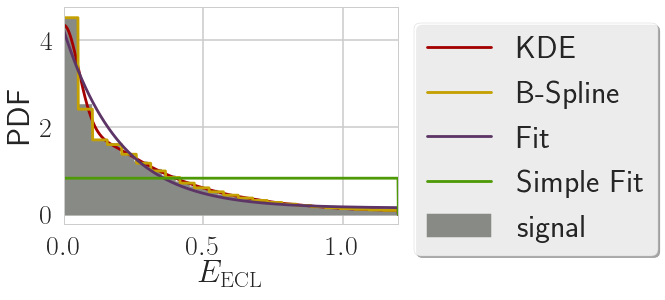

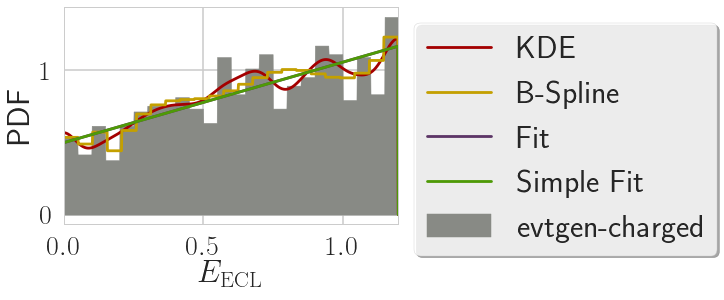

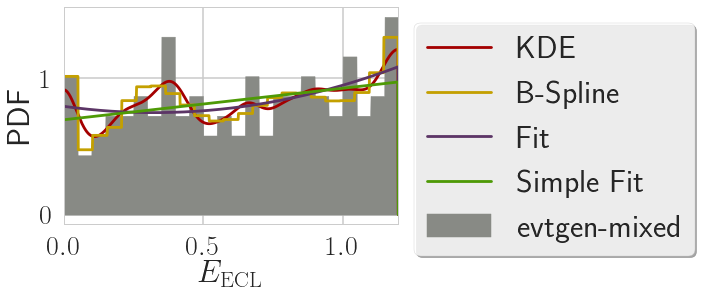

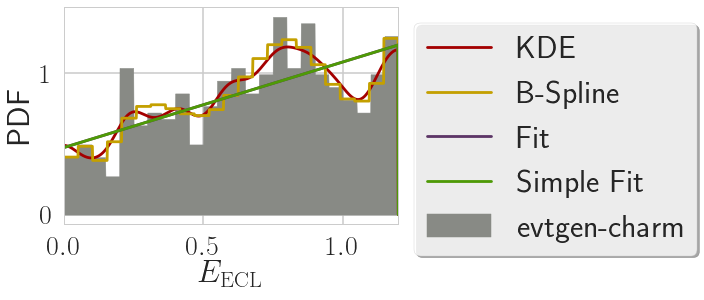

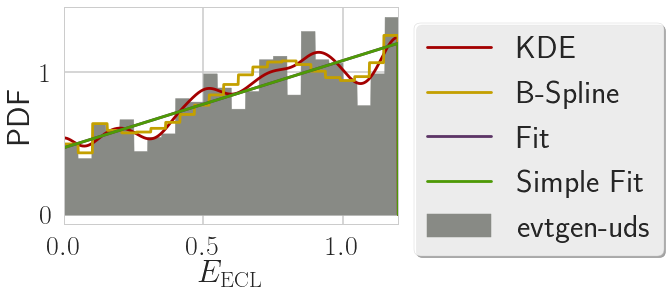

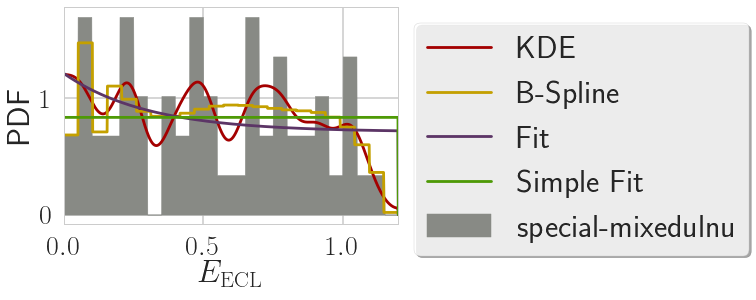

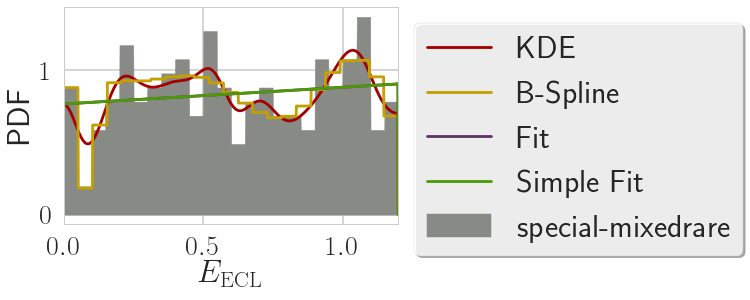

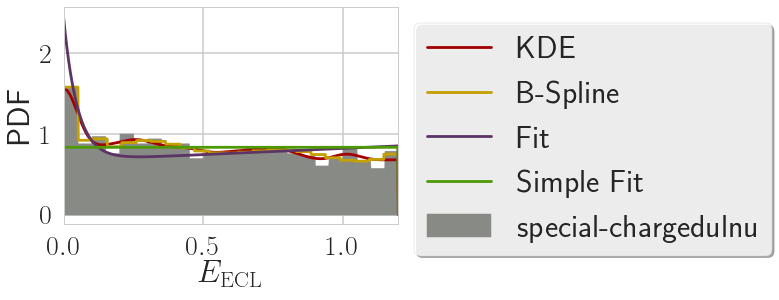

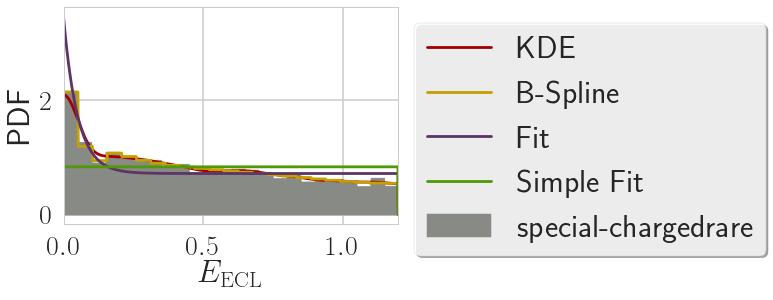

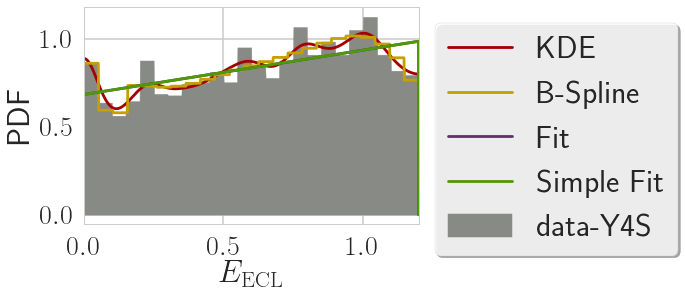

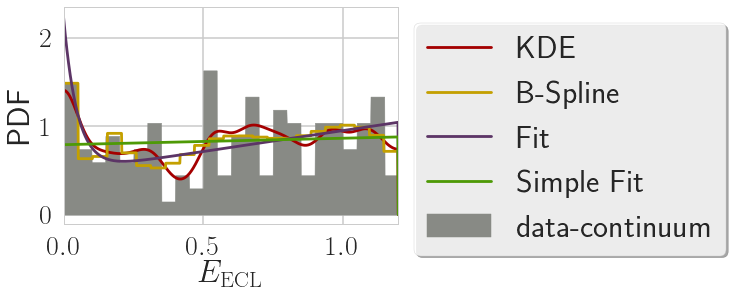

In [62]:
templates = final_templates[3]
for et in event_types:
    plt.fill_between(space, templates['raw'][et].pdf(space), color=Tango.slate_light, label=et)
    plt.plot(space, templates['kde'][et].pdf(space), color=Tango.scarlet_red_dark, label='KDE')
    plt.plot(space, templates['bsp'][et].pdf(space), color=Tango.butter_dark, label='B-Spline')
    plt.plot(space, templates['fit'][et].pdf(space), color=Tango.plum_dark, label='Fit')
    plt.plot(space, templates['sim'][et].pdf(space), color=Tango.chameleon_dark, label='Simple Fit')
    plt.xlim(binning['range'])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlabel(r'$E_{\mathrm{ECL}}$')
    plt.ylabel(r'PDF')
    plt.show()

In [67]:
background_components = ['evtgen-charged', 'evtgen-mixed',
                         'special-chargedulnu', 'special-chargedrare',
                         'special-mixedulnu', 'special-mixedrare']
#continuum_components = ['evtgen-charm', 'evtgen-uds']
continuum_components = ['data-continuum']
x[x.index.get_level_values('event_types').isin(background_components)].weight.sum()

1693.9099999999999

In [71]:
def sanitize(s):
    return s.replace('-', '')

def individual_fit(df, templates):
    background_components = ['evtgen-charged', 'evtgen-mixed',
                             'special-chargedulnu', 'special-chargedrare',
                             'special-mixedulnu', 'special-mixedrare']
    #continuum_components = ['evtgen-charm', 'evtgen-uds']
    continuum_components = ['data-continuum']
    
    extra_energy_distribution = scipy_extra.stats.rv_mixture([
        ('signal', templates['raw']['signal']),
        ('background', scipy_extra.stats.rv_mixture([(sanitize(c), templates['fit'][c]) for c in background_components])),
        ('continuum', scipy_extra.stats.rv_mixture([(sanitize(c), templates['sim'][c]) for c in continuum_components]))
    ])
    
    total_background = df[df.index.get_level_values('event_types').isin(background_components)].weight.sum()
    total_continuum = df[df.index.get_level_values('event_types').isin(continuum_components)].weight.sum()
    print("Brackground Fraction", total_background / (total_background + total_continuum))
    print("Continuum Fraction", total_continuum / (total_background + total_continuum))
    
    def mapping(free_parameters):
        # Restrict all norms to positive values
        free_parameters = np.maximum(free_parameters, 0.0)
        parameters = {
            'signal_loc': 0.0,
            'signal_scale': 1.0,
            'signal_norm': free_parameters[0],
            'background_loc': 0.0,
            'background_scale': 1.0,
            'background_norm': free_parameters[1] * total_background / (total_background + total_continuum),
            'continuum_loc': 0.0,
            'continuum_scale': 1.0,
            'continuum_norm': free_parameters[1] * total_continuum / (total_background + total_continuum),
        } 

        for c in background_components:
            parameters['background_' + sanitize(c) + '_loc'] = 0.0
            parameters['background_' + sanitize(c) + '_scale'] = 1.0
            parameters['background_' + sanitize(c) + '_norm'] = (
                x[x.index.get_level_values('event_types').isin([c])].weight.sum() / total_background
            )

        for c in continuum_components:
            parameters['continuum_' + sanitize(c) + '_loc'] = 0.0
            parameters['continuum_' + sanitize(c) + '_scale'] = 1.0
            parameters['continuum_' + sanitize(c) + '_norm'] = (
                x[x.index.get_level_values('event_types').isin([c])].weight.sum() / total_continuum
            )

        return parameters
    
    def normalisation(p):
        return p['signal_norm'] + p['background_norm'] + p['continuum_norm']
    
    fitter = scipy_extra.fit.Fitter(mapping, extra_energy_distribution, normalisation)
    r = fitter.fit([0.1, 0.9], df.loc['data-Y4S'][extraEnergy].values)

    return r, extra_energy_distribution(**mapping(r.x))


def plot_data_and_model(data, r, fitted_distribution, overall_norm=1.0):
    content, boundaries = np.histogram(data[extraEnergy].values, **binning)
    plt.errorbar((boundaries[1:] + boundaries[:-1])/2, content, yerr=np.sqrt(content), color='black', ls='', fmt='s', markersize=10, lw=3, label='on-resonance data')
    
    weight = len(data) / binning['bins'] * (binning['range'][1] - binning['range'][0])
    plt.fill_between(space, weight * overall_norm * fitted_distribution.pdf(space), label='fit', color=Tango.chocolate)
    for name, distribution, norm_name, shape_names in zip(fitted_distribution.dist._components,
                                                          fitted_distribution.dist._distributions,
                                                          fitted_distribution.dist._distribution_norms,
                                                          fitted_distribution.dist._distribution_shapes):
        norm = fitted_distribution.kwds[norm_name]
        shapes = {'_'.join(k.split('_')[1:]) : fitted_distribution.kwds[k] for k in shape_names}
        plt.plot(space, weight * norm * distribution.pdf(space, **shapes), label=name, color=Component.get_color(name))
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlim(0.0, 1.2)
    plt.show()

Brackground Fraction 0.956127464703
Continuum Fraction 0.043872535297


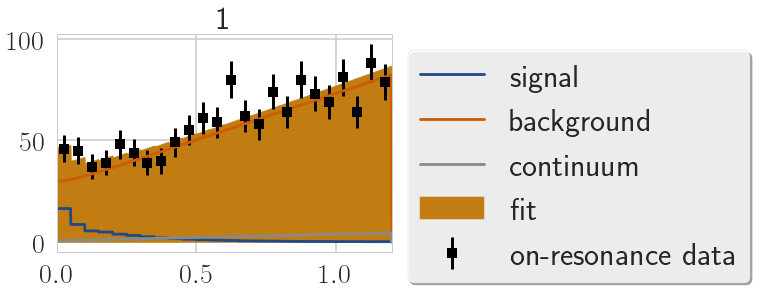

1 1.06896775868
1.0000028601
0.000106896775868
Brackground Fraction 0.952249285276
Continuum Fraction 0.0477507147236


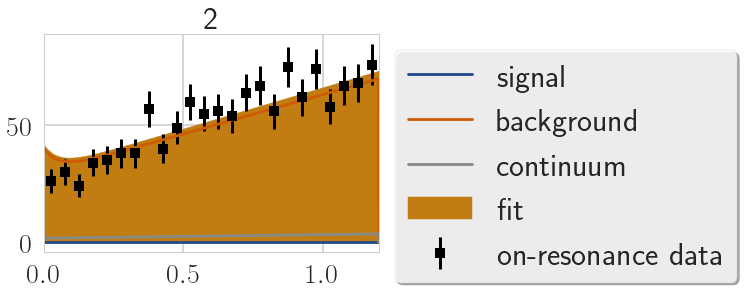

2 -1.85330699918
0.950058429798
-0.000185330699918
Brackground Fraction 0.544811194761
Continuum Fraction 0.455188805239


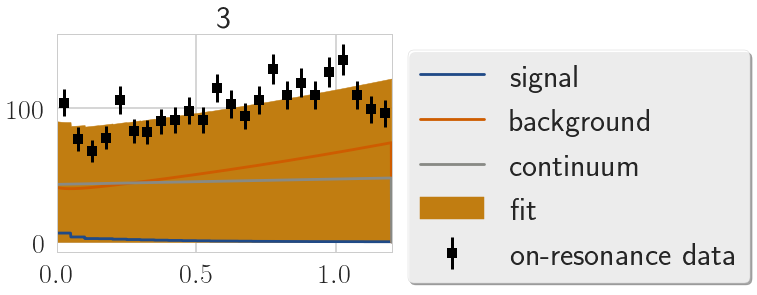

3 0.0748277498207
0.999963127892
7.48277498207e-06
Brackground Fraction 0.55447005453
Continuum Fraction 0.44552994547


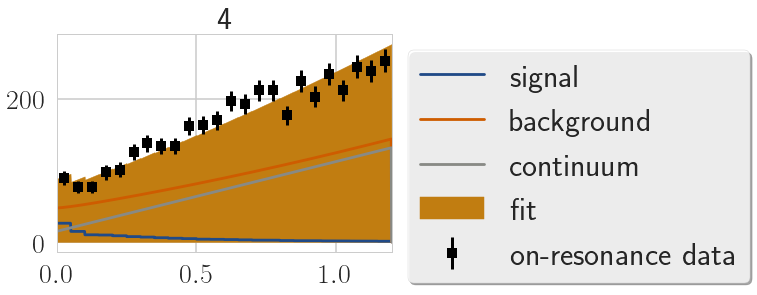

4 1.88770935289
1.00001754767
0.000188770935289
Brackground Fraction 0.707267008993
Continuum Fraction 0.292732991007


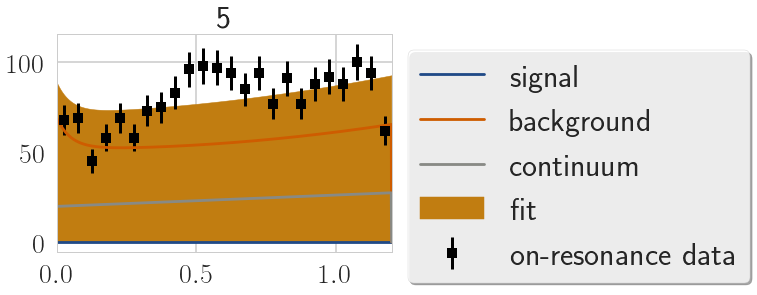

5 -6.73549166619
0.954025385366
-0.000673549166619
Brackground Fraction 0.966091497245
Continuum Fraction 0.0339085027546


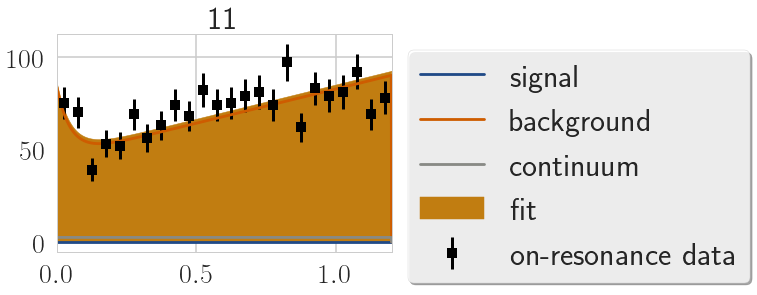

11 -1.69290347942
0.940093907533
-0.000169290347942
Brackground Fraction 0.940241361944
Continuum Fraction 0.059758638056


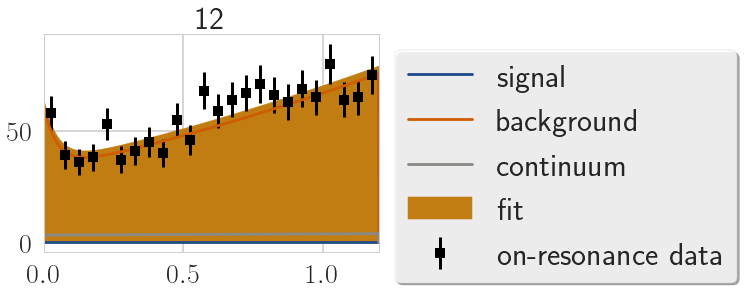

12 -1.55877977314
0.957409009745
-0.000155877977314
Brackground Fraction 0.516683241014
Continuum Fraction 0.483316758986


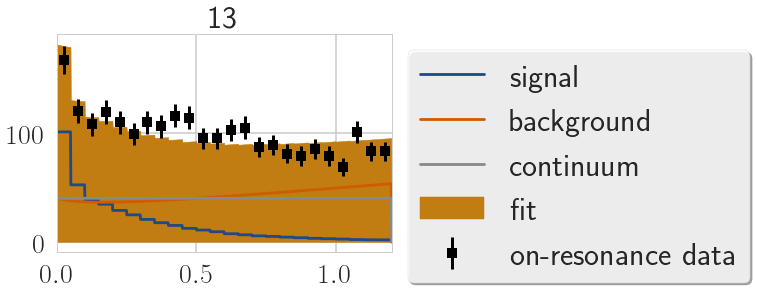

13 1.02105320387
1.00004802706
0.000102105320387
Brackground Fraction 0.682603282603
Continuum Fraction 0.317396717397


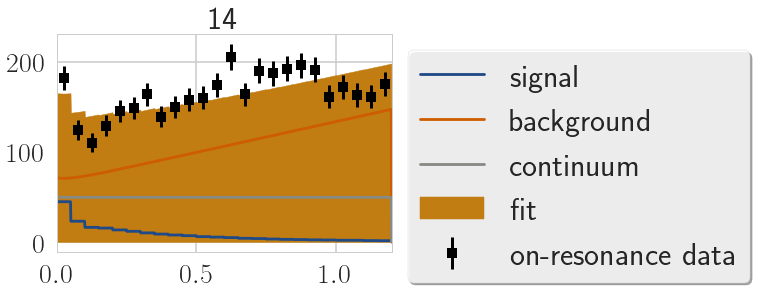

14 2.19161255057
0.999999221411
0.000219161255057
Brackground Fraction 0.785011320901
Continuum Fraction 0.214988679099


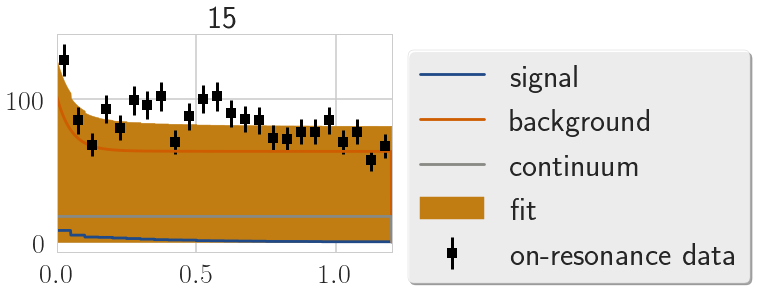

15 2.11003682452
1.00000354131
0.000211003682452


In [72]:
branching_fractions = {}

efficiency = {
    1: 6.1e-4,
    2: 4.1e-4,
    3: 10.1e-4,
    4: 6.0e-4,
    5: 1.4e-4,
    11: 6.8e-4,
    12: 4.2e-4,
    13: 10.5e-4,
    14: 7.6e-4,
    15: 1.7e-4,
}

cross_feed = {
    1: 0.91,
    2: 0.93,
    3: 0.20,
    4: 0.68,
    5: 0.82,
    11: 0.86,
    12: 0.87,
    13: 0.20,
    14: 0.64,
    15: 0.77,
}

for dM in [1,2,3,4,5,11,12,13,14,15]:
    r, fitted_distribution = individual_fit(df.loc[dM], final_templates[dM])
    plt.title(str(dM))
    plot_data_and_model(df.loc[dM].loc['data-Y4S'], r, fitted_distribution)

    scale = len(df.loc[dM].loc['data-Y4S']) / (772e6 * efficiency[dM]) * cross_feed[dM]
    print(dM, r.x[0] * scale * 1e4)
    branching_fractions[dM] = r.x[0] * scale
    print(r.x[0] + r.x[1])
    print(branching_fractions[dM])
    #uncertainty = fitter.get_likelihood_uncertainty({'signal_norm': [0.0, 1.0]}, [result['signal_norm']], r.fun, fit_model, data)
    #branching_fractions[dM] = uncertainties.ufloat(result['signal_norm'],
    #                                               max(abs(uncertainty[0][0]-result['signal_norm']),
    #                                                   abs(uncertainty[0][1]-result['signal_norm']))) * scale

In [52]:
def global_fit(data, templates, decayModeIDs, smoother='sim'):
    background_components = ['evtgen-charged', 'evtgen-mixed',
                             'special-chargedulnu', 'special-chargedrare',
                             'special-mixedulnu', 'special-mixedrare']
    #continuum_components = ['evtgen-charm', 'evtgen-uds']
    continuum_components = ['data-continuum']
    
    extra_energy_distributions = [ scipy_extra.stats.rv_mixture([
        ('signal', templates[dM]['raw']['signal']),
        ('background', scipy_extra.stats.rv_mixture([(sanitize(c), templates[dM][smoother][c]) for c in background_components])),
        ('continuum', scipy_extra.stats.rv_mixture([(sanitize(c), templates[dM][smoother][c]) for c in continuum_components]))
    ]) for dM in decayModeIDs]
    
    background_sums = {dM: {c: data[data.index.get_level_values('event_types').isin([c])].loc[dM].weight.sum() for c in background_components}
                        for dM in decayModeIDs}
    continuum_sums = {dM: {c: data[data.index.get_level_values('event_types').isin([c])].loc[dM].weight.sum() for c in continuum_components}
                      for dM in decayModeIDs}
    signal_sum = {dM: data[data.index.get_level_values('event_types').isin(['signal'])].loc[dM].weight.sum() for dM in decayModeIDs}
    
    def mapping(free_parameters):
        # Restrict all norms to positive values
        free_parameters = np.maximum(free_parameters, 0.0)
        
        all_parameters = []
        for i, dM in enumerate(decayModeIDs):
            parameters = {
                'signal_loc': 0.0,
                'signal_scale': 1.0,
                'signal_norm': free_parameters[0] * (772e6 * efficiency[dM]) / (sum(background_sum[dM].values()) + sum(continuum_sum[dM].values()) + signal_sum[dM]),
                'background_loc': 0.0,
                'background_scale': 1.0,
                'background_norm': free_parameters[i+1] * sum(background_sum[dM].values()) / (sum(background_sum[dM].values()) + sum(continuum_sum[dM].values()) + signal_sum[dM]),
                'continuum_loc': 0.0,
                'continuum_scale': 1.0,
                'continuum_norm': free_parameters[i+1] * sum(continuum_sum[dM].values()) / (sum(background_sum[dM].values()) + sum(continuum_sum[dM].values()) + signal_sum[dM]),
            }

            for c in background_components:
                parameters['background_' + sanitize(c) + '_loc'] = 0.0
                parameters['background_' + sanitize(c) + '_scale'] = 1.0
                parameters['background_' + sanitize(c) + '_norm'] = background_sums[dM][c] / sum(background_sum[dM].values())

            for c in continuum_components:
                parameters['continuum_' + sanitize(c) + '_loc'] = 0.0
                parameters['continuum_' + sanitize(c) + '_scale'] = 1.0
                parameters['continuum_' + sanitize(c) + '_norm'] = continuum_sums[dM][c] / sum(continuum_sum[dM].values())
            all_parameters += [parameters]

        return all_parameters
    
    def normalisation(p):
        return p['signal_norm'] + p['background_norm'] + p['continuum_norm']
    
    fitter = scipy_extra.fit.Fitter(mapping, extra_energy_distributions, normalisation)
    r = fitter.fit([1e-4] + [0.9]*5, [data.loc[dM].loc['data-Y4S'][extraEnergy].values for dM in decayModeIDs])

    return r, extra_energy_distributions, mapping

In [53]:
r, distributions, mapping = global_fit(df, final_templates, [1,2,3,4,5])
r

 final_simplex: (array([[  9.24105941e-05,   9.99970507e-01,   1.00001553e+00,
          9.99973426e-01,   9.99996580e-01,   1.00001468e+00],
       [  9.24238627e-05,   1.00001602e+00,   9.99945075e-01,
          1.00002254e+00,   9.99997718e-01,   1.00001022e+00],
       [  9.24079297e-05,   9.99965459e-01,   9.99969466e-01,
          1.00001839e+00,   9.99983476e-01,   9.99979008e-01],
       [  9.24265139e-05,   1.00002046e+00,   9.99951307e-01,
          1.00000859e+00,   9.99983364e-01,   9.99959832e-01],
       [  9.24176840e-05,   1.00003537e+00,   9.99960454e-01,
          9.99991564e-01,   9.99987092e-01,   9.99956812e-01],
       [  9.24157431e-05,   1.00002091e+00,   9.99989311e-01,
          9.99964816e-01,   9.99952224e-01,   1.00000293e+00],
       [  9.23915442e-05,   1.00002191e+00,   1.00009299e+00,
          1.00000031e+00,   1.00000950e+00,   1.00003112e+00]]), array([-73900.08794124, -73900.08794029, -73900.08794027, -73900.0879391 ,
       -73900.08793899, -73900.

In [48]:
mapping(r.x)

[{'background_evtgencharged_loc': 0.0,
  'background_evtgencharged_norm': 0.81842193370782346,
  'background_evtgencharged_scale': 1.0,
  'background_evtgenmixed_loc': 0.0,
  'background_evtgenmixed_norm': 0.084942276453008947,
  'background_evtgenmixed_scale': 1.0,
  'background_loc': 0.0,
  'background_norm': 0.78498816858303244,
  'background_scale': 1.0,
  'background_specialchargedrare_loc': 0.0,
  'background_specialchargedrare_norm': 0.033468496955718408,
  'background_specialchargedrare_scale': 1.0,
  'background_specialchargedulnu_loc': 0.0,
  'background_specialchargedulnu_norm': 0.0579715536376375,
  'background_specialchargedulnu_scale': 1.0,
  'background_specialmixedrare_loc': 0.0,
  'background_specialmixedrare_norm': 0.001165631238917203,
  'background_specialmixedrare_scale': 1.0,
  'background_specialmixedulnu_loc': 0.0,
  'background_specialmixedulnu_norm': 0.0040301080068945849,
  'background_specialmixedulnu_scale': 1.0,
  'continuum_datacontinuum_loc': 0.0,
  'con

Branching fraction 0.924105941402


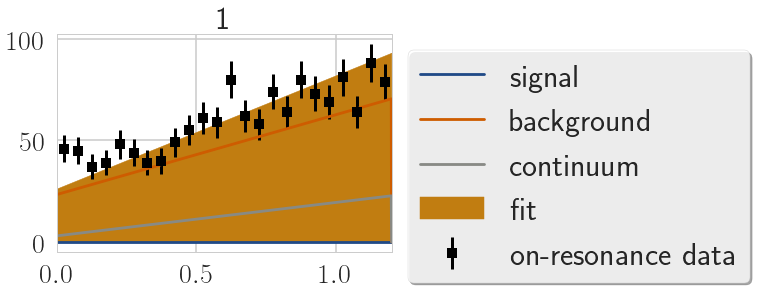

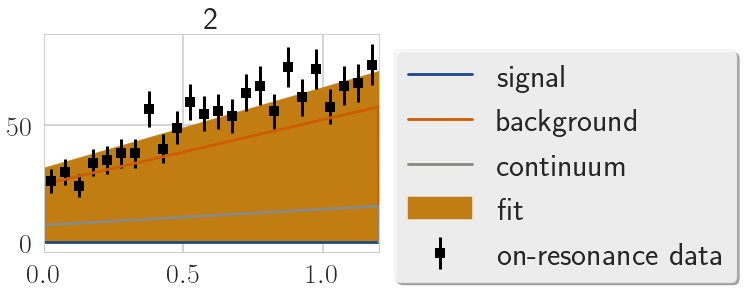

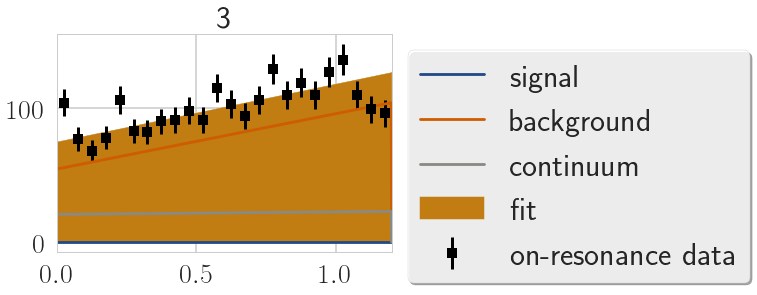

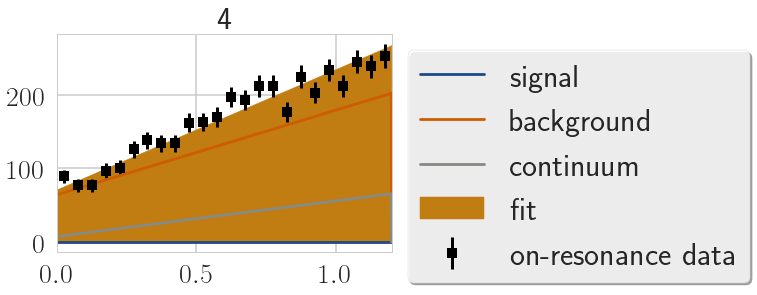

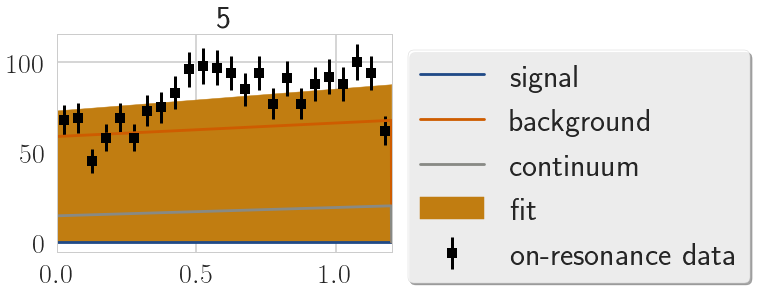

In [47]:
print("Branching fraction", r.x[0] * 1e4)

for i, dM in enumerate([1,2,3,4,5]):
    data = df.loc[dM].loc['data-Y4S']
    fitted_distribution = distributions[i](**mapping(r.x)[i])
    m = mapping(r.x)[i]
    overall_norm = m['signal_norm'] + m['background_norm'] + m['continuum_norm']
    plt.title(str(dM))
    plot_data_and_model(data, r, fitted_distribution, overall_norm)

In [ ]:
from IPython.core import debugger
debug = debugger.Pdb()
#debug.runcall(dist.pdf, space)